Figura do eletrodo OZ:


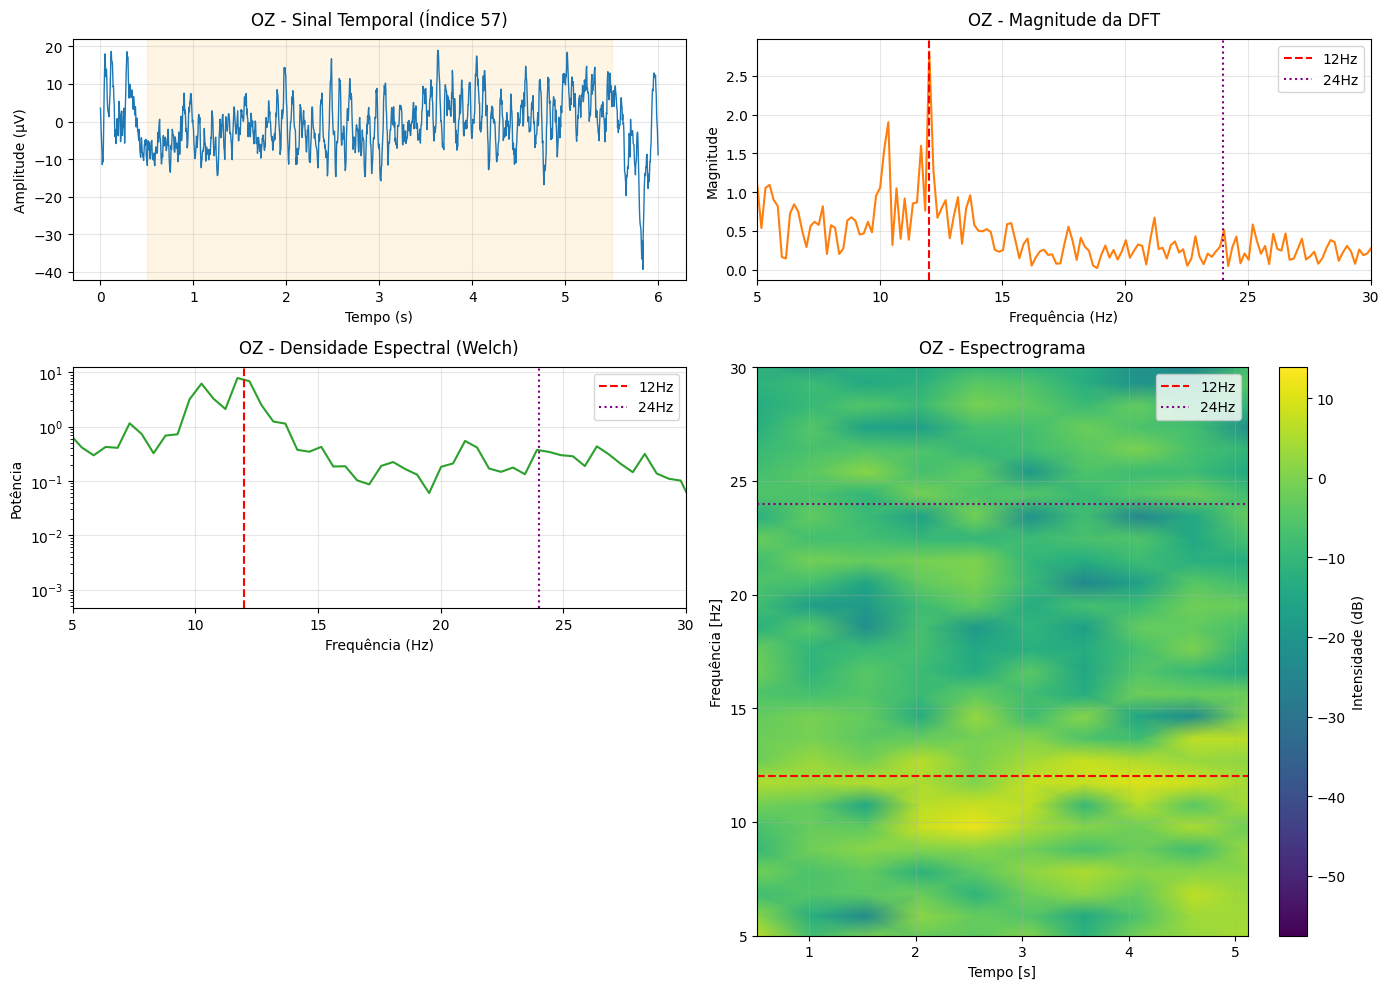


Figura do eletrodo C3:


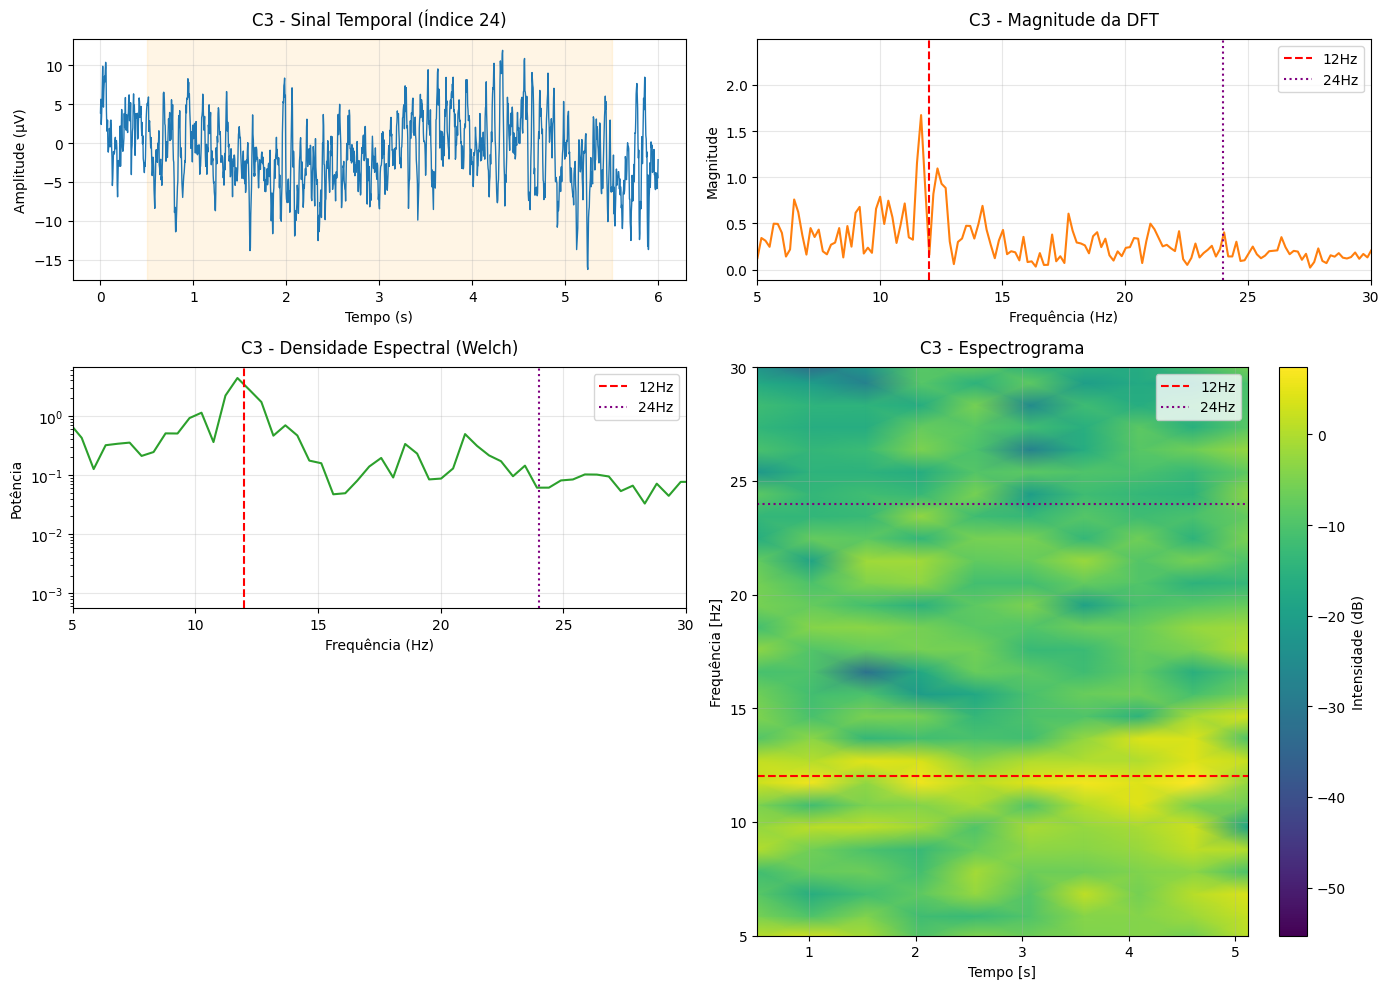


Figura do eletrodo FP1:


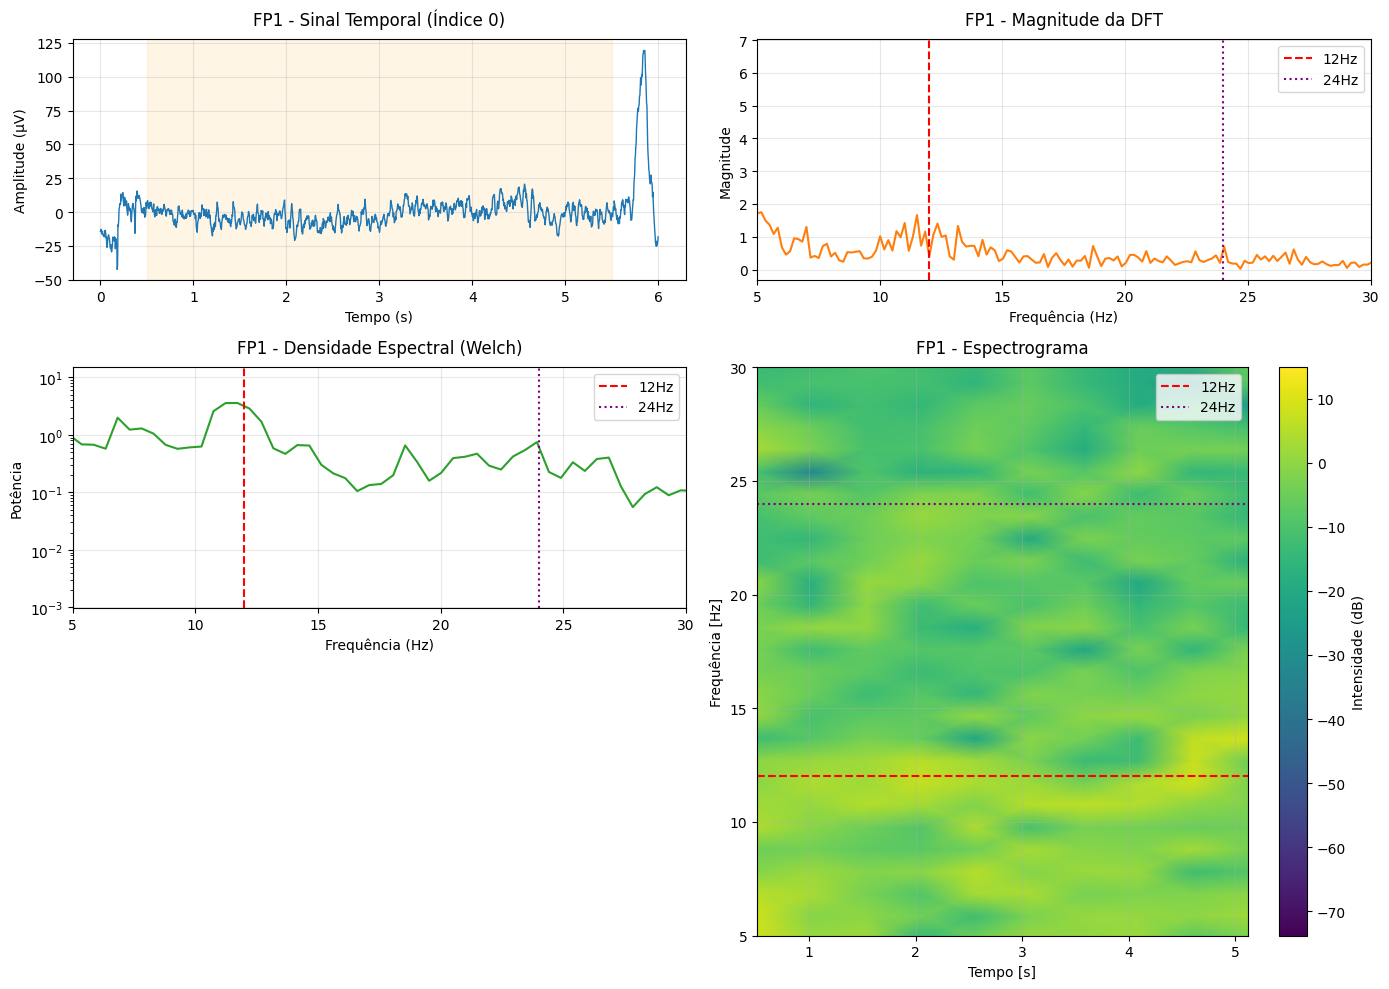


Plotagem concluída!


In [ ]:
# EX (b)

# ==================================================
# 1. CONFIGURAÇÃO INICIAL 
# ==================================================
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fft
import scipy.io
from matplotlib.gridspec import GridSpec

plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.grid': True,
    'grid.alpha': 0.3,
    'axes.titlepad': 10
})

# ==================================================
# 2. CARREGAMENTO DOS DADOS 
# ==================================================
try:
    freq_phase = scipy.io.loadmat('Freq_Phase.mat')
    s01_data = scipy.io.loadmat('S01.mat')['data']  # Formato [64, 1500, 40, 6]
    frequencies = freq_phase['freqs'].flatten()
except FileNotFoundError as e:
    raise FileNotFoundError(f"Arquivo essencial faltando: {e.filename}")

# ==================================================
# 3. DEFINIÇÃO DOS 3 CANAIS 
# ==================================================
channels = {
    'OZ': 57,    # Canal occipital
    'C3': 24,    # Área motora
    'FP1': 0     # Frontal
}

# ==================================================
# 4. PARÂMETROS DE ANÁLISE 
# ==================================================
fs = 250          # Frequência de amostragem
stim_freq = 12.0  # Frequência do estímulo visual
session = 0       # Primeira sessão
target_idx = np.where(frequencies == stim_freq)[0][0]
trials_12hz = s01_data[:, :, target_idx, session]  # Dados para 12Hz [64, 1500]

# ==================================================
# 5. LOOP PARA PLOTAR FIGURAS NA TELA 
# ==================================================
for name, idx in channels.items():
    # Seleciona o sinal do canal
    eeg_signal = trials_12hz[idx, :]

    # Cria uma nova figura para cada eletrodo
    fig = plt.figure(figsize=(14, 10), num=f"Análise do Eletrodo {name}")  # Título da janela
    gs = GridSpec(3, 2, figure=fig)

    # 5.1 Sinal no tempo
    ax1 = fig.add_subplot(gs[0, 0])
    t = np.arange(len(eeg_signal))/fs
    ax1.plot(t, eeg_signal, color='#1f77b4', linewidth=1)
    ax1.axvspan(0.5, 5.5, color='orange', alpha=0.1)
    ax1.set_title(f"{name} - Sinal Temporal (Índice {idx})")
    ax1.set_ylabel('Amplitude (μV)')
    ax1.set_xlabel('Tempo (s)')

    # 5.2 Magnitude da DFT
    ax2 = fig.add_subplot(gs[0, 1])
    n = len(eeg_signal)
    yf = fft.fft(eeg_signal)
    xf = np.linspace(0.0, fs/2, n//2)
    ax2.plot(xf, 2.0/n * np.abs(yf[:n//2]), color='#ff7f0e')
    ax2.axvline(stim_freq, color='red', linestyle='--', label='12Hz')
    ax2.axvline(2*stim_freq, color='purple', linestyle=':', label='24Hz')
    ax2.set_title(f"{name} - Magnitude da DFT")
    ax2.set_ylabel('Magnitude')
    ax2.set_xlabel('Frequência (Hz)')
    ax2.set_xlim(5, 30)
    ax2.legend()

    # 5.3 Densidade espectral de potência (Welch)
    ax3 = fig.add_subplot(gs[1, 0])
    f, Pxx = signal.welch(eeg_signal, fs=fs, nperseg=512)
    ax3.semilogy(f, Pxx, color='#2ca02c')
    ax3.axvline(stim_freq, color='red', linestyle='--', label='12Hz')
    ax3.axvline(2*stim_freq, color='purple', linestyle=':', label='24Hz')
    ax3.set_title(f"{name} - Densidade Espectral (Welch)")
    ax3.set_ylabel('Potência')
    ax3.set_xlabel('Frequência (Hz)')
    ax3.set_xlim(5, 30)
    ax3.legend()

    # 5.4 Espectrograma
    ax4 = fig.add_subplot(gs[1:, 1])
    f, t_spec, Sxx = signal.spectrogram(eeg_signal, fs=fs, nperseg=256, noverlap=128)
    im = ax4.pcolormesh(t_spec, f, 10*np.log10(Sxx), shading='gouraud', cmap='viridis')
    ax4.axhline(stim_freq, color='red', linestyle='--', label='12Hz')
    ax4.axhline(2*stim_freq, color='purple', linestyle=':', label='24Hz')
    ax4.set_title(f"{name} - Espectrograma")
    ax4.set_ylabel('Frequência [Hz]')
    ax4.set_xlabel('Tempo [s]')
    ax4.set_ylim(5, 30)
    fig.colorbar(im, ax=ax4, label='Intensidade (dB)')
    ax4.legend(loc='upper right')

    print(f"Figura do eletrodo {name}:")
    plt.tight_layout()
    plt.show()
    print()

print("Plotagem concluída!")


▶ Plotando eletrodo OZ (índice 57) - Sessão 1
   • Frequência do estímulo: 8.0Hz
   • Harmônica esperada: 16.0Hz


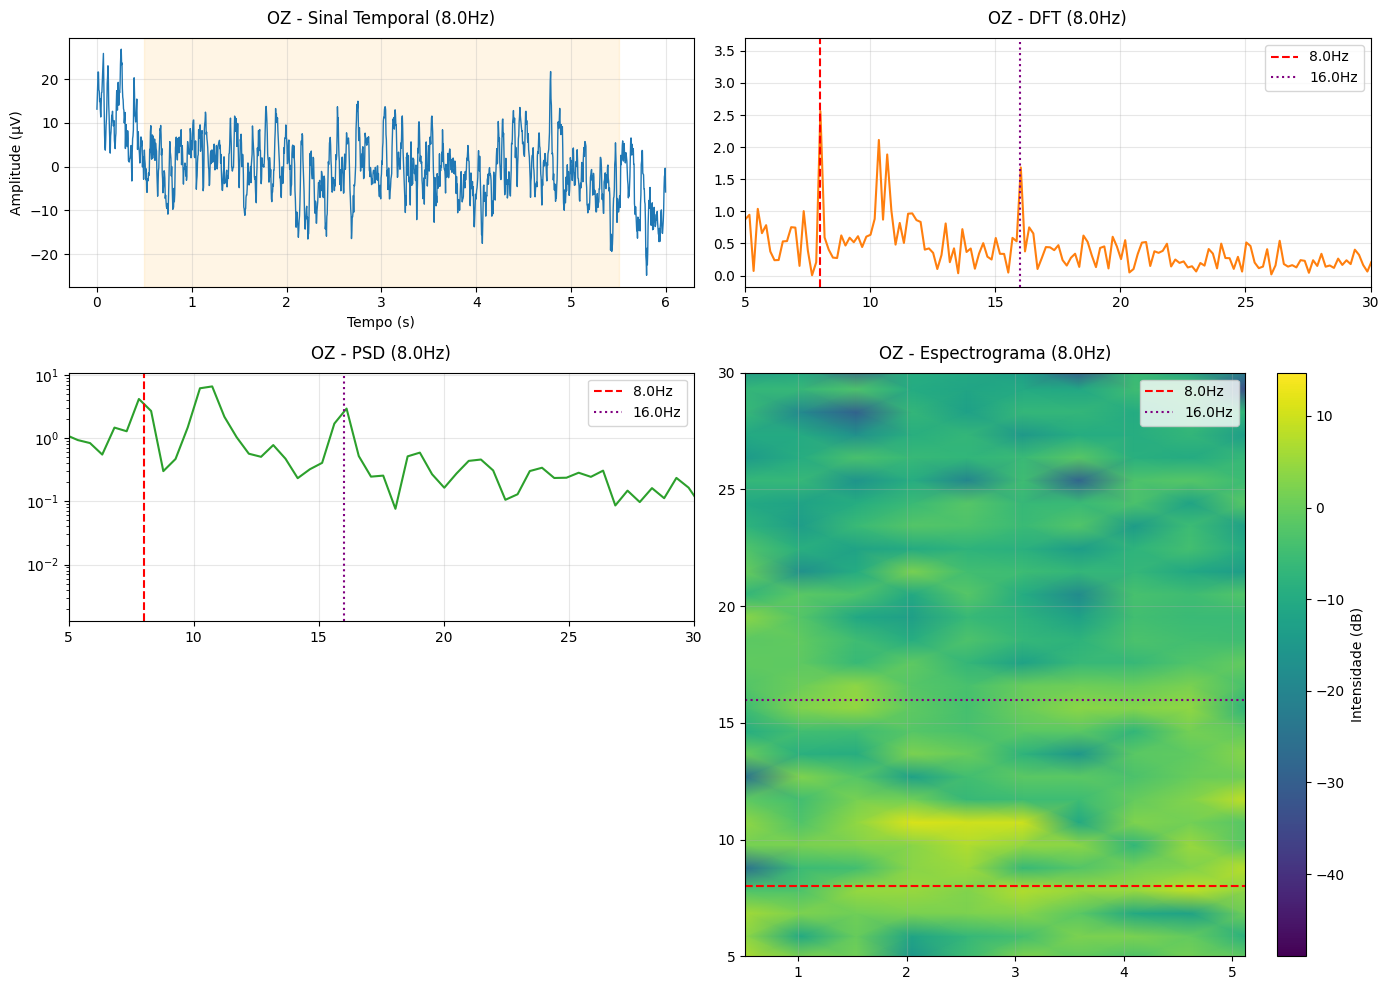


▶ Plotando eletrodo OZ (índice 57) - Sessão 1
   • Frequência do estímulo: 12.0Hz
   • Harmônica esperada: 24.0Hz


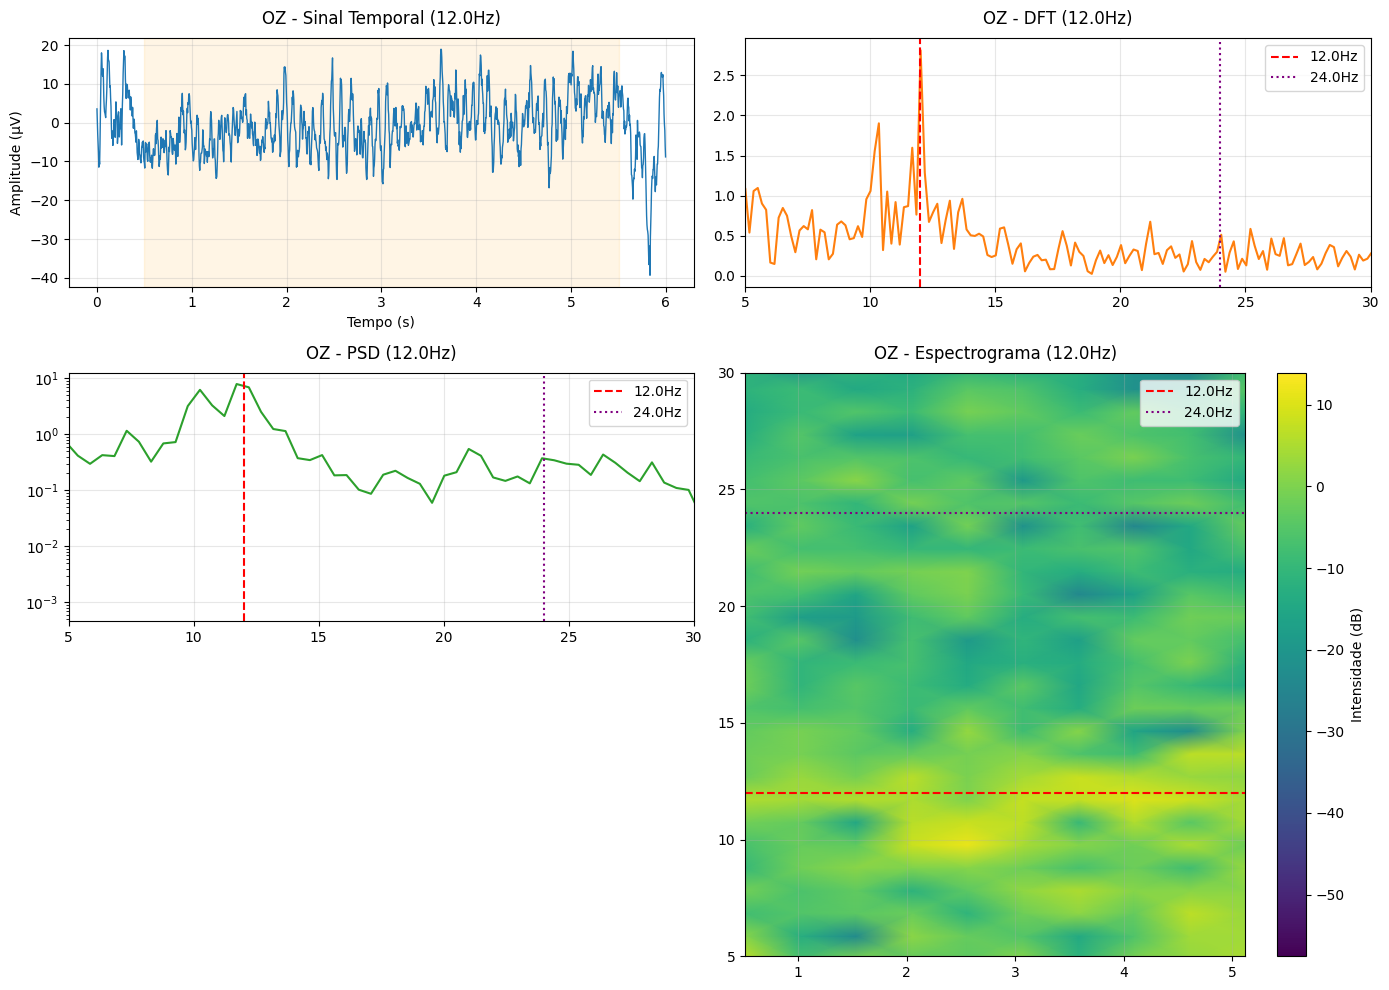


▶ Plotando eletrodo OZ (índice 57) - Sessão 1
   • Frequência do estímulo: 15.0Hz
   • Harmônica esperada: 30.0Hz


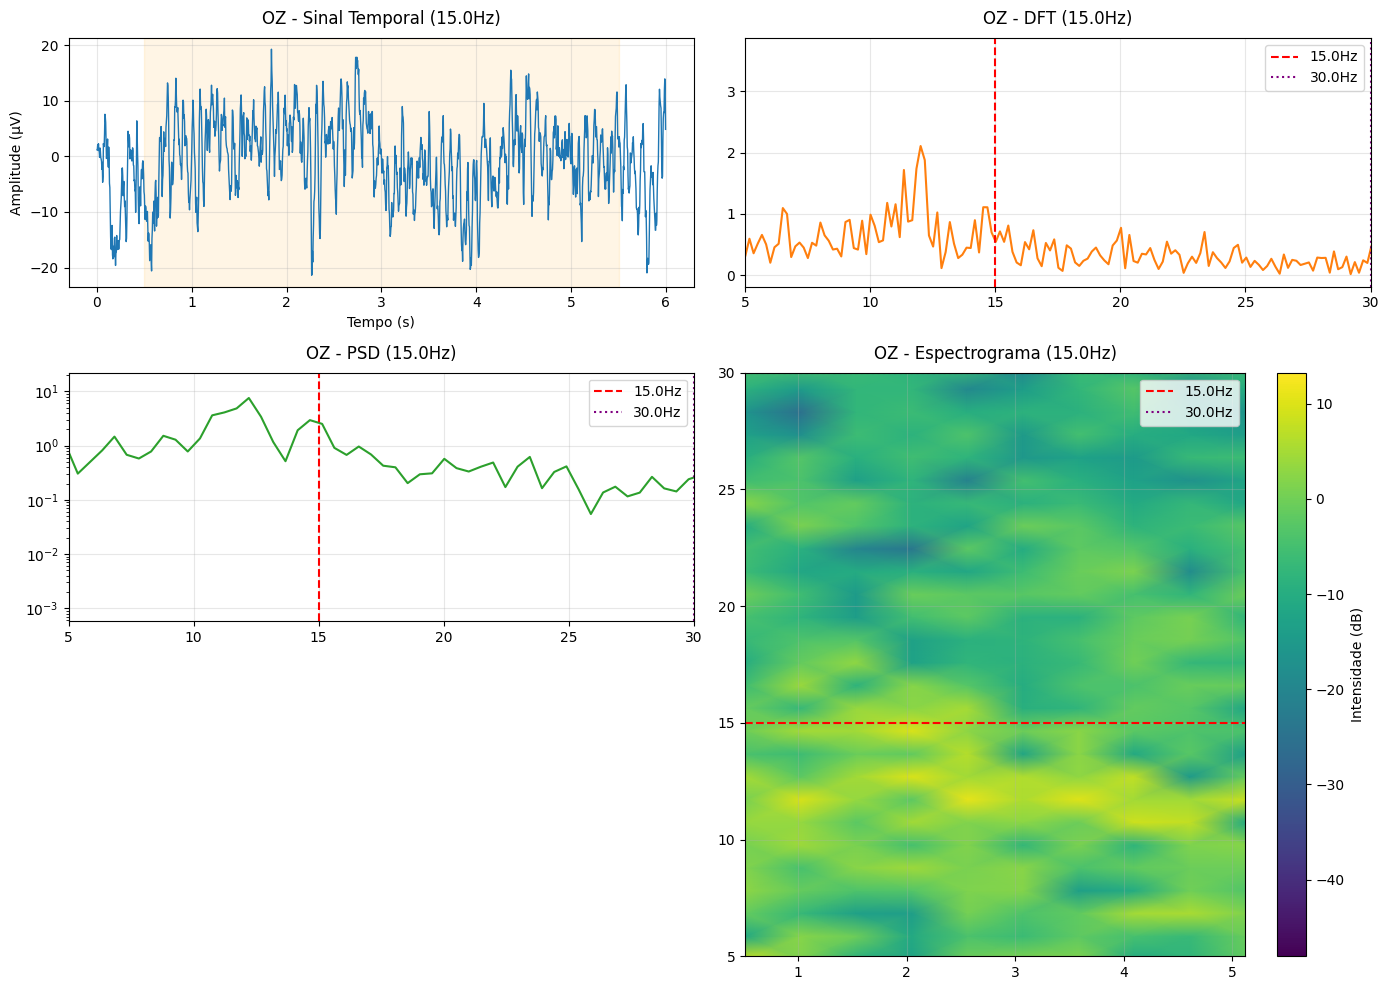


Análise concluída para todas as frequências!


In [ ]:
# EX (C): comparar EEGs de 1 user, 1 eletrodo (occipital) e 1 sessao, mas diferentes frequências de estimulo.
# user s1, eletrodo oz
# ==================================================
# ANÁLISE COMPARATIVA PARA DIFERENTES FREQUÊNCIAS (OZ)
# ==================================================

# Configurações iniciais (mesmas importações e parâmetros)
eletrodo = 'OZ'  # Focaremos apenas no occipital
idx = channels[eletrodo]  # Índice do OZ
session = 0       # Mesma sessão (0)

# Lista de frequências de estímulo para comparar
frequencias_alvo = [8.0, 12.0, 15.0]  # Substitua pelas frequências do seu experimento

for freq in frequencias_alvo:
    # Obtém os trials para a frequência atual
    target_idx = np.where(np.isclose(frequencies, freq))[0][0]
    trials = s01_data[:, :, target_idx, session]
    eeg_signal = trials[idx, :]  # Sinal do OZ

    # PRINT ÚNICO ANTES DE PLOTAR TUDO PARA ESTA FREQUÊNCIA
    print(f"\n▶ Plotando eletrodo {eletrodo} (índice {idx}) - Sessão {session+1}")
    print(f"   • Frequência do estímulo: {freq}Hz")
    print(f"   • Harmônica esperada: {2*freq}Hz")

    # Cria figura para esta frequência
    fig = plt.figure(figsize=(14, 10), num=f"OZ - Frequência {freq}Hz")
    gs = GridSpec(3, 2, figure=fig)

    # 1. Sinal no tempo
    ax1 = fig.add_subplot(gs[0, 0])
    t = np.arange(len(eeg_signal))/fs
    ax1.plot(t, eeg_signal, color='#1f77b4', linewidth=1)
    ax1.axvspan(0.5, 5.5, color='orange', alpha=0.1)
    ax1.set_title(f"OZ - Sinal Temporal ({freq}Hz)")
    ax1.set_ylabel('Amplitude (μV)')
    ax1.set_xlabel('Tempo (s)')

    # 2. Magnitude da DFT
    ax2 = fig.add_subplot(gs[0, 1])
    n = len(eeg_signal)
    yf = fft.fft(eeg_signal)
    xf = np.linspace(0.0, fs/2, n//2)
    ax2.plot(xf, 2.0/n * np.abs(yf[:n//2]), color='#ff7f0e')
    ax2.axvline(freq, color='red', linestyle='--', label=f'{freq}Hz')
    ax2.axvline(2*freq, color='purple', linestyle=':', label=f'{2*freq}Hz')
    ax2.set_title(f"OZ - DFT ({freq}Hz)")
    ax2.set_xlim(5, 30)
    ax2.legend()

    # 3. Densidade espectral (Welch)
    ax3 = fig.add_subplot(gs[1, 0])
    f, Pxx = signal.welch(eeg_signal, fs=fs, nperseg=512)
    ax3.semilogy(f, Pxx, color='#2ca02c')
    ax3.axvline(freq, color='red', linestyle='--', label=f'{freq}Hz')
    ax3.axvline(2*freq, color='purple', linestyle=':', label=f'{2*freq}Hz')
    ax3.set_title(f"OZ - PSD ({freq}Hz)")
    ax3.set_xlim(5, 30)
    ax3.legend()

    # 4. Espectrograma
    ax4 = fig.add_subplot(gs[1:, 1])
    f, t_spec, Sxx = signal.spectrogram(eeg_signal, fs=fs, nperseg=256, noverlap=128)
    im = ax4.pcolormesh(t_spec, f, 10*np.log10(Sxx), shading='gouraud', cmap='viridis')
    ax4.axhline(freq, color='red', linestyle='--', label=f'{freq}Hz')
    ax4.axhline(2*freq, color='purple', linestyle=':', label=f'{2*freq}Hz')
    ax4.set_title(f"OZ - Espectrograma ({freq}Hz)")
    ax4.set_ylim(5, 30)
    fig.colorbar(im, ax=ax4, label='Intensidade (dB)')
    ax4.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

print("\nAnálise concluída para todas as frequências!")

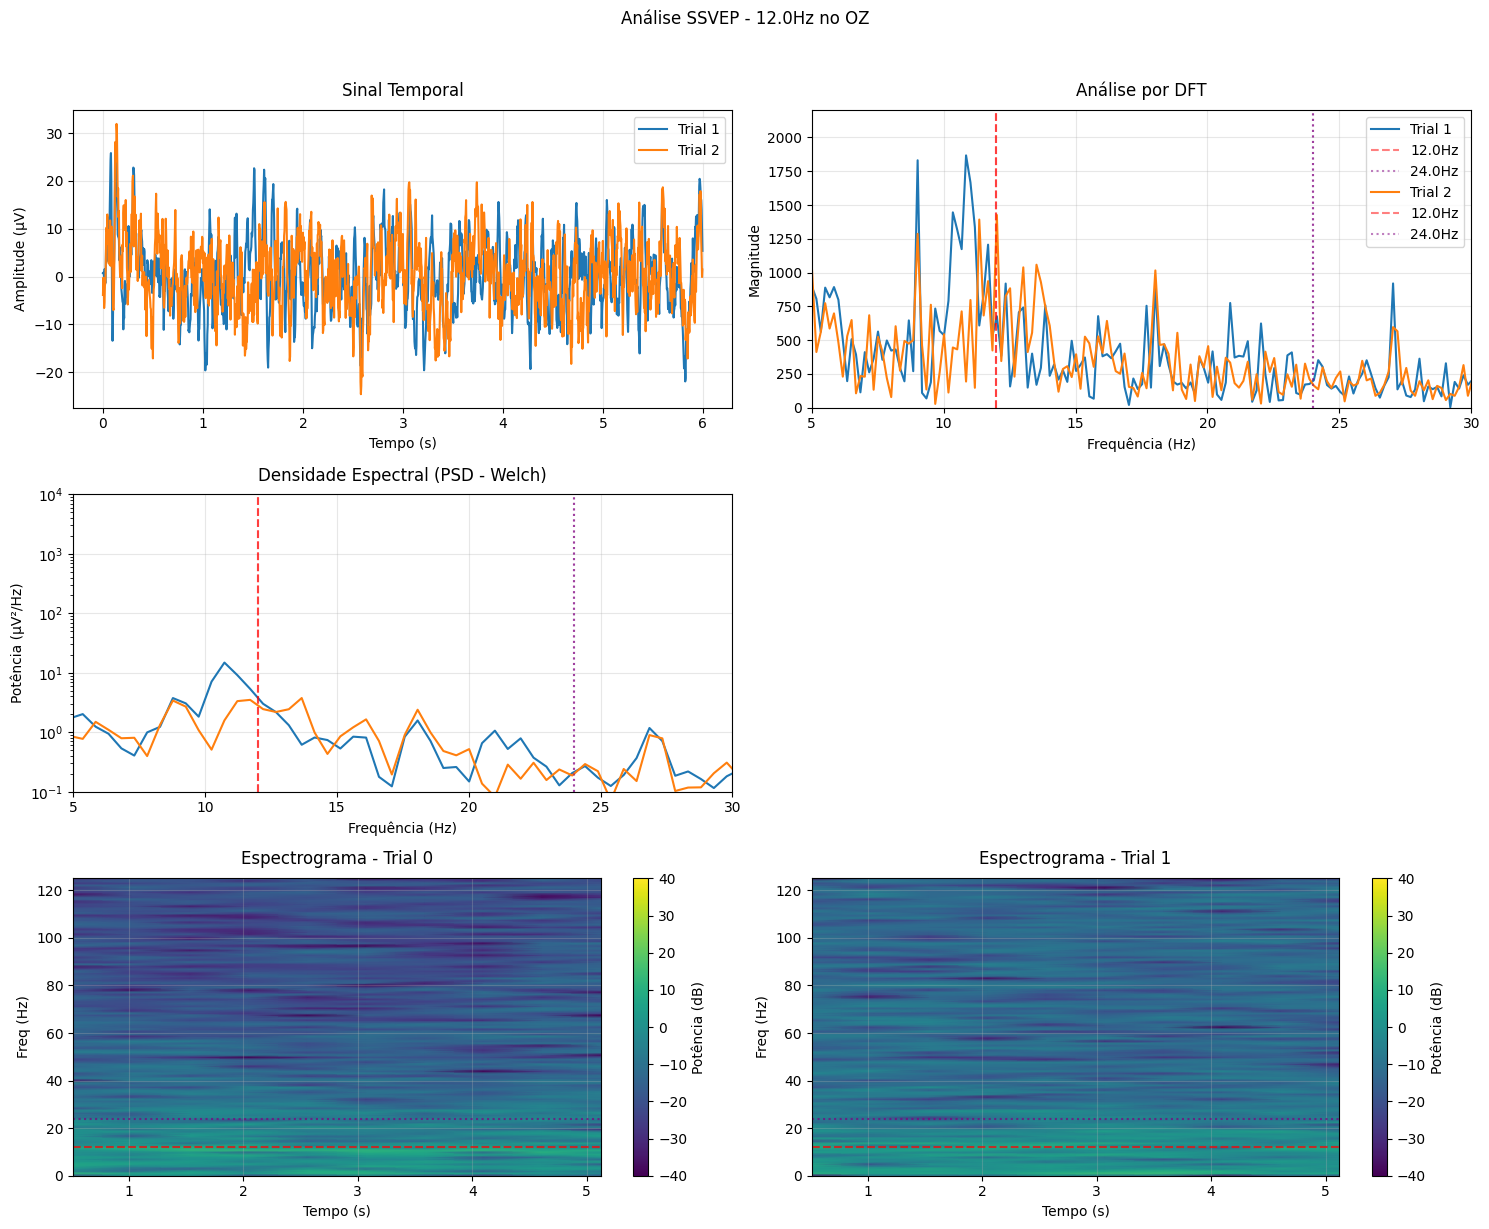


RELATÓRIO DE CONSISTÊNCIA:
▶ Trial 1:
   - SNR: 20.91 dB
   - Potência em 12.0Hz: 3.01 µV²/Hz
   - Potência em 24.0Hz: 0.21 µV²/Hz
   - Razão Harm/Fund: 6.83%
   - Frequência de pico DFT: 0.83 Hz

▶ Trial 2:
   - SNR: 14.34 dB
   - Potência em 12.0Hz: 2.45 µV²/Hz
   - Potência em 24.0Hz: 0.19 µV²/Hz
   - Razão Harm/Fund: 7.66%
   - Frequência de pico DFT: 1.17 Hz



In [ ]:
# EX d: comparar como o mesmo EEG varia entre trials/sessões, mesmo participante, mesma frequência, mesmo eletrodo.
# ================================================
# ANALISADOR DE TRIALS SSVEP (VERSÃO COMPLETA)
# ================================================
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fft
import scipy.io
from scipy.signal import butter, filtfilt

# Configurações
usuario = "S01"
freq_alvo = 12.0          # Frequência do estímulo (Hz)
eletrodo = "OZ"           # Eletrodo de interesse
trials = [0, 1]           # Trials para comparação
fs = 250                  # Frequência de amostragem (Hz)

# Carrega os dados
data = scipy.io.loadmat('S01.mat')
dados = data['data']       # Formato: [canais, amostras, frequências, trials]
frequencies = data['frequencies'].flatten() if 'frequencies' in data else np.array([8, 12, 15])

# Pré-processamento com filtro high-pass (remove <0.5Hz)
b, a = butter(4, 0.5, btype='highpass', fs=fs)
idx_eletrodo = 57          # Índice do OZ
idx_freq = np.where(np.isclose(frequencies, freq_alvo))[0][0]

# Filtra os sinais
sinais = [filtfilt(b, a, dados[idx_eletrodo, :, idx_freq, trial]) for trial in trials]

# ================================================
# Plotagem (3 linhas: Temporal, Frequência, Tempo-Frequência)
# ================================================
plt.figure(figsize=(15, 12))
plt.suptitle(f"Análise SSVEP - {freq_alvo}Hz no {eletrodo}", y=1.02)

# 1. Sinal Temporal
plt.subplot(3, 2, 1)
for i, trial in enumerate(trials):
    t = np.arange(len(sinais[i]))/fs
    plt.plot(t, sinais[i], label=f'Trial {trial+1}')
plt.title("Sinal Temporal")
plt.xlabel("Tempo (s)"); plt.ylabel("Amplitude (µV)")
plt.grid(True, alpha=0.3)
plt.legend()

# 2. Análise por DFT
plt.subplot(3, 2, 2)
for i, trial in enumerate(trials):
    n = len(sinais[i])
    yf = np.abs(fft.fft(sinais[i]))[:n//2]
    xf = np.linspace(0, fs/2, n//2)
    plt.plot(xf, yf, label=f'Trial {trial+1}')

    # Linhas de referência
    plt.axvline(freq_alvo, color='red', linestyle='--', alpha=0.5, label=f'{freq_alvo}Hz')
    plt.axvline(2*freq_alvo, color='purple', linestyle=':', alpha=0.5, label=f'{2*freq_alvo}Hz')

plt.title("Análise por DFT")
plt.xlabel("Frequência (Hz)"); plt.ylabel("Magnitude")
plt.xlim(5, 30); plt.ylim(0, None)
plt.grid(True, alpha=0.3)
plt.legend()

# 3. Densidade Espectral (PSD)
plt.subplot(3, 2, 3)
for i, trial in enumerate(trials):
    f, psd = signal.welch(sinais[i], fs=fs, nperseg=512, scaling='density')
    plt.semilogy(f, psd, label=f'Trial {trial+1}')
    plt.axvline(freq_alvo, color='red', linestyle='--', alpha=0.5)
    plt.axvline(2*freq_alvo, color='purple', linestyle=':', alpha=0.5)
plt.title("Densidade Espectral (PSD - Welch)")
plt.xlabel("Frequência (Hz)"); plt.ylabel("Potência (µV²/Hz)")
plt.xlim(5, 30); plt.ylim(1e-1, 1e4)
plt.grid(True, alpha=0.3)

# 4-5. Espectrogramas
for i, trial in enumerate(trials, start=4):
    plt.subplot(3, 2, i+1)
    f, t, Sxx = signal.spectrogram(sinais[i-4], fs=fs, nperseg=256, noverlap=128)
    plt.pcolormesh(t, f, 10*np.log10(Sxx), shading='gouraud', cmap='viridis', vmin=-40, vmax=40)
    plt.axhline(freq_alvo, color='red', linestyle='--', alpha=0.7)
    plt.axhline(2*freq_alvo, color='purple', linestyle=':', alpha=0.7)
    plt.title(f"Espectrograma - Trial {trial}")
    plt.xlabel("Tempo (s)"); plt.ylabel("Freq (Hz)")
    plt.colorbar(label='Potência (dB)')

plt.tight_layout()
plt.show()

# ================================================
# Cálculo de Métricas Automáticas
# ================================================
print("\nRELATÓRIO DE CONSISTÊNCIA:")
for i, trial in enumerate(trials):
    # Remove DC offset
    sinal = sinais[i] - np.mean(sinais[i])

    # PSD via Welch
    f, psd = signal.welch(sinal, fs=fs, nperseg=512, scaling='density')
    idx_alvo = np.argmin(np.abs(f - freq_alvo))
    idx_harm = np.argmin(np.abs(f - 2*freq_alvo))

    # Regiões de ruído (evitando as frequências de interesse)
    idx_ruido = ((f < freq_alvo-2) | (f > freq_alvo+2)) & ((f < 2*freq_alvo-2) | (f > 2*freq_alvo+2))

    # Cálculo do SNR e métricas
    snr = 10 * np.log10(psd[idx_alvo] / np.median(psd[idx_ruido]))
    potencia_fund = psd[idx_alvo]
    potencia_harm = psd[idx_harm]
    razao_harm = (potencia_harm / potencia_fund) * 100

    # DFT para verificação
    n = len(sinal)
    yf = np.abs(fft.fft(sinal))[:n//2]
    xf = np.linspace(0, fs/2, n//2)
    freq_pico = xf[np.argmax(yf)]

    print(f"▶ Trial {trial+1}:")
    print(f"   - SNR: {snr:.2f} dB")
    print(f"   - Potência em {freq_alvo}Hz: {potencia_fund:.2f} µV²/Hz")
    print(f"   - Potência em {2*freq_alvo}Hz: {potencia_harm:.2f} µV²/Hz")
    print(f"   - Razão Harm/Fund: {razao_harm:.2f}%")
    print(f"   - Frequência de pico DFT: {freq_pico:.2f} Hz\n")

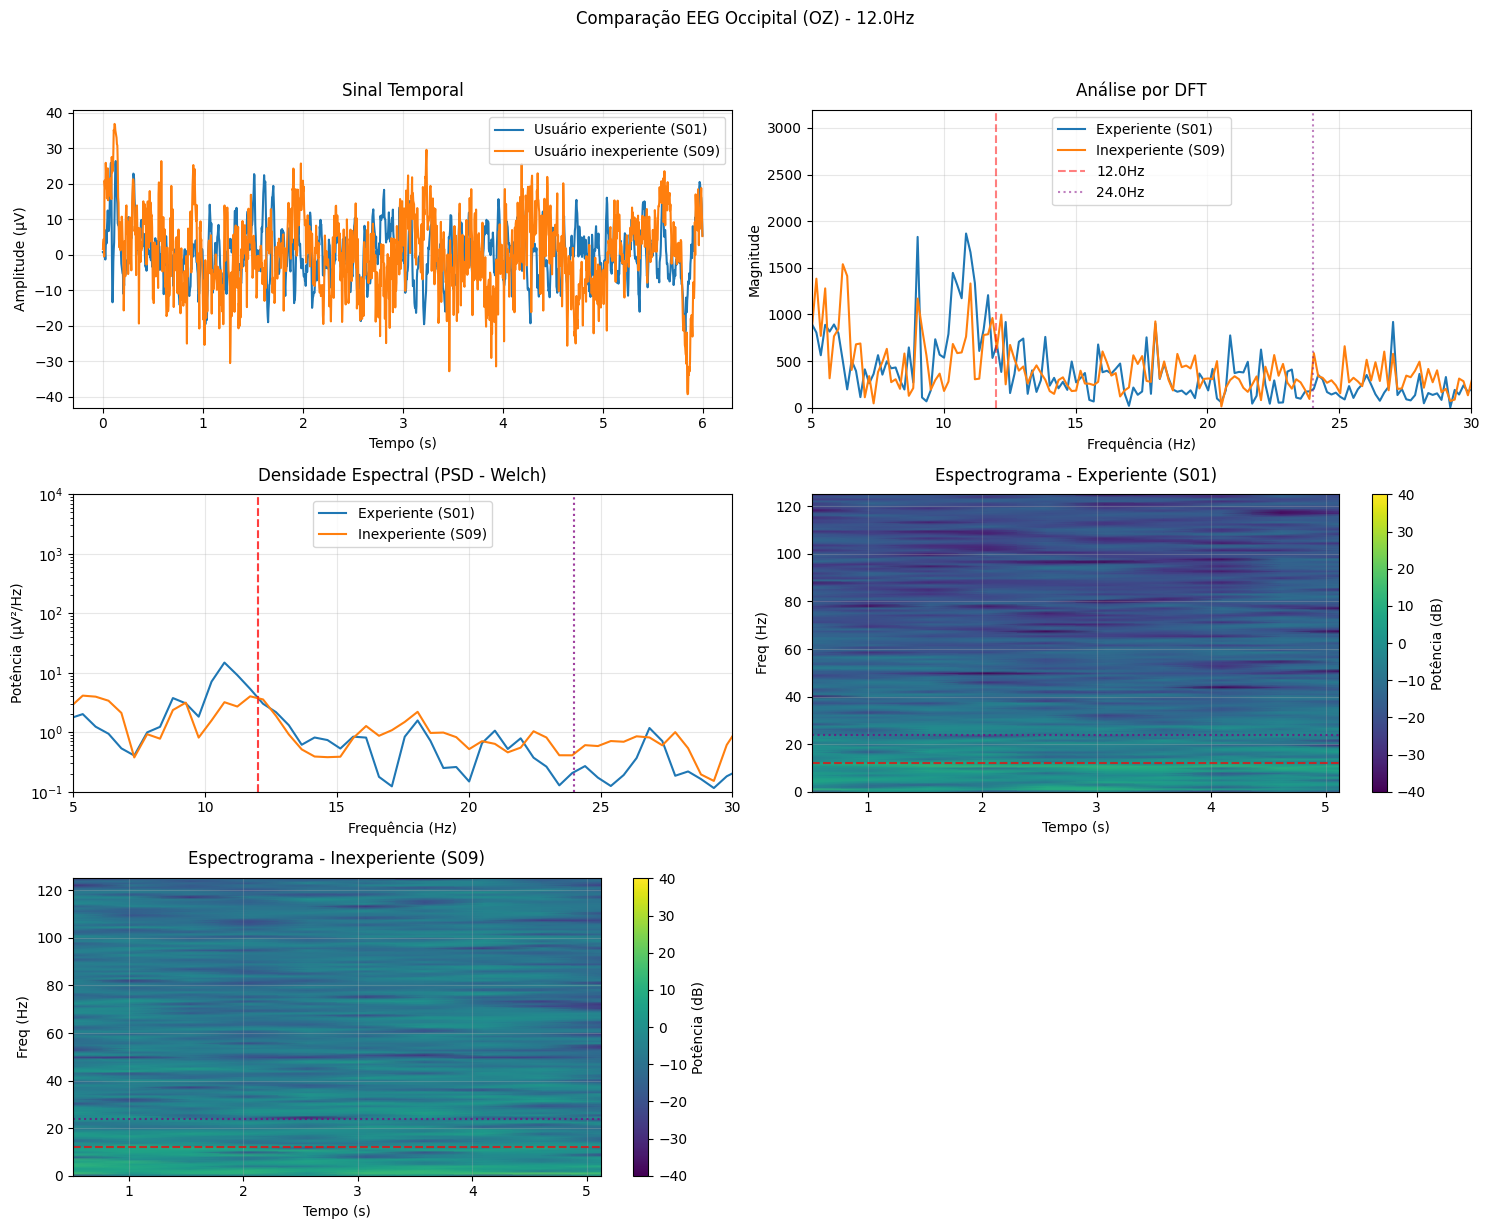


RELATÓRIO COMPARATIVO ENTRE USUÁRIOS:
▶ Eletrodo: OZ | Frequência: 12.0Hz
══════════════════════════════════════════════════
Métrica                   | Experiente (S01) | Inexperiente (S09)
══════════════════════════════════════════════════
SNR                       | 20.91           | 10.56          
Potência Fundamental      | 3.01            | 3.56           
Potência Harmônica        | 0.21            | 0.41           
Razão Harm/Fund           | 6.83            | 11.50          
Frequência de Pico        | 0.83            | 1.67           
Variabilidade Temporal    | 7.45            | 10.96          
══════════════════════════════════════════════════

ANÁLISE DE DIFERENÇAS:
1. Resposta SSVEP:
   - Usuário experiente mostra SNR 10.36 dB maior
   - Potência fundamental 0.8x maior no experiente

2. Harmônicos:
   - Razão harmônico/fundamental 4.7% diferente
   * Maior razão pode indicar processamento visual mais complexo

3. Variabilidade Temporal:
   - Usuário inexperiente mostra 

In [ ]:
# ================================================
# ANALISADOR DE EEG ENTRE USUÁRIOS (OZ)
# ================================================
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fft
import scipy.io
from scipy.signal import butter, filtfilt

# Configurações
usuario_experiente = "S01"  # Usuário com experiência em BCI
usuario_inexperiente = "S09" # Usuário sem experiência (S09-S35)
freq_alvo = 12.0            # Frequência do estímulo (Hz)
eletrodo = "OZ"             # Eletrodo occipital de interesse
trial = 0                   # Trial selecionado para análise
fs = 250                    # Frequência de amostragem (Hz)

# Função para carregar e processar dados de um usuário
def processar_usuario(arquivo, freq_alvo, eletrodo_idx=57, trial=0):
    data = scipy.io.loadmat(arquivo)
    dados = data['data']
    frequencies = data['frequencies'].flatten() if 'frequencies' in data else np.array([8, 12, 15])

    # Pré-processamento
    b, a = butter(4, 0.5, btype='highpass', fs=fs)
    idx_freq = np.where(np.isclose(frequencies, freq_alvo))[0][0]
    sinal = filtfilt(b, a, dados[eletrodo_idx, :, idx_freq, trial])

    return sinal, frequencies

# Carrega dados dos dois usuários
sinal_exp, _ = processar_usuario(f'{usuario_experiente}.mat', freq_alvo, trial=trial)
sinal_inexp, _ = processar_usuario(f'{usuario_inexperiente}.mat', freq_alvo, trial=trial)

# ================================================
# Plotagem Comparativa (3 linhas: Temporal, Frequência, Tempo-Frequência)
# ================================================
plt.figure(figsize=(15, 12))
plt.suptitle(f"Comparação EEG Occipital ({eletrodo}) - {freq_alvo}Hz", y=1.02)

# 1. Sinal Temporal
plt.subplot(3, 2, 1)
t = np.arange(len(sinal_exp))/fs
plt.plot(t, sinal_exp, label=f'Usuário experiente ({usuario_experiente})')
plt.plot(t, sinal_inexp, label=f'Usuário inexperiente ({usuario_inexperiente})')
plt.title("Sinal Temporal")
plt.xlabel("Tempo (s)"); plt.ylabel("Amplitude (µV)")
plt.grid(True, alpha=0.3)
plt.legend()

# 2. Análise por DFT
plt.subplot(3, 2, 2)
for sinal, label in zip([sinal_exp, sinal_inexp],
                       [f'Experiente ({usuario_experiente})',
                        f'Inexperiente ({usuario_inexperiente})']):
    n = len(sinal)
    yf = np.abs(fft.fft(sinal))[:n//2]
    xf = np.linspace(0, fs/2, n//2)
    plt.plot(xf, yf, label=label)

# Linhas de referência
plt.axvline(freq_alvo, color='red', linestyle='--', alpha=0.5, label=f'{freq_alvo}Hz')
plt.axvline(2*freq_alvo, color='purple', linestyle=':', alpha=0.5, label=f'{2*freq_alvo}Hz')

plt.title("Análise por DFT")
plt.xlabel("Frequência (Hz)"); plt.ylabel("Magnitude")
plt.xlim(5, 30); plt.ylim(0, None)
plt.grid(True, alpha=0.3)
plt.legend()

# 3. Densidade Espectral (PSD)
plt.subplot(3, 2, 3)
for sinal, label in zip([sinal_exp, sinal_inexp],
                       [f'Experiente ({usuario_experiente})',
                        f'Inexperiente ({usuario_inexperiente})']):
    f, psd = signal.welch(sinal, fs=fs, nperseg=512, scaling='density')
    plt.semilogy(f, psd, label=label)
    plt.axvline(freq_alvo, color='red', linestyle='--', alpha=0.5)
    plt.axvline(2*freq_alvo, color='purple', linestyle=':', alpha=0.5)
plt.title("Densidade Espectral (PSD - Welch)")
plt.xlabel("Frequência (Hz)"); plt.ylabel("Potência (µV²/Hz)")
plt.xlim(5, 30); plt.ylim(1e-1, 1e4)
plt.grid(True, alpha=0.3)
plt.legend()

# 4-5. Espectrogramas
for i, (sinal, label) in enumerate(zip([sinal_exp, sinal_inexp],
                                     [f'Experiente ({usuario_experiente})',
                                      f'Inexperiente ({usuario_inexperiente})'])):
    plt.subplot(3, 2, i+4)
    f, t, Sxx = signal.spectrogram(sinal, fs=fs, nperseg=256, noverlap=128)
    plt.pcolormesh(t, f, 10*np.log10(Sxx), shading='gouraud', cmap='viridis', vmin=-40, vmax=40)
    plt.axhline(freq_alvo, color='red', linestyle='--', alpha=0.7)
    plt.axhline(2*freq_alvo, color='purple', linestyle=':', alpha=0.7)
    plt.title(f"Espectrograma - {label}")
    plt.xlabel("Tempo (s)"); plt.ylabel("Freq (Hz)")
    plt.colorbar(label='Potência (dB)')

plt.tight_layout()
plt.show()

# ================================================
# Cálculo de Métricas Comparativas
# ================================================
def calcular_metricas(sinal, fs, freq_alvo):
    # Remove DC offset
    sinal = sinal - np.mean(sinal)

    # PSD via Welch
    f, psd = signal.welch(sinal, fs=fs, nperseg=512, scaling='density')
    idx_alvo = np.argmin(np.abs(f - freq_alvo))
    idx_harm = np.argmin(np.abs(f - 2*freq_alvo))

    # Regiões de ruído
    idx_ruido = ((f < freq_alvo-2) | (f > freq_alvo+2)) & ((f < 2*freq_alvo-2) | (f > 2*freq_alvo+2))

    # Cálculo do SNR e métricas
    snr = 10 * np.log10(psd[idx_alvo] / np.median(psd[idx_ruido]))
    potencia_fund = psd[idx_alvo]
    potencia_harm = psd[idx_harm]
    razao_harm = (potencia_harm / potencia_fund) * 100

    # DFT para verificação
    n = len(sinal)
    yf = np.abs(fft.fft(sinal))[:n//2]
    xf = np.linspace(0, fs/2, n//2)
    freq_pico = xf[np.argmax(yf)]

    return {
        'SNR': snr,
        'Potência Fundamental': potencia_fund,
        'Potência Harmônica': potencia_harm,
        'Razão Harm/Fund': razao_harm,
        'Frequência de Pico': freq_pico,
        'Variabilidade Temporal': np.std(sinal)
    }

# Calcula métricas para ambos os usuários
metricas_exp = calcular_metricas(sinal_exp, fs, freq_alvo)
metricas_inexp = calcular_metricas(sinal_inexp, fs, freq_alvo)

# Exibe relatório comparativo
print("\nRELATÓRIO COMPARATIVO ENTRE USUÁRIOS:")
print(f"▶ Eletrodo: {eletrodo} | Frequência: {freq_alvo}Hz")
print("═"*50)
print(f"{'Métrica':<25} | {'Experiente ('+usuario_experiente+')':<15} | {'Inexperiente ('+usuario_inexperiente+')':<15}")
print("═"*50)
for chave in metricas_exp:
    print(f"{chave:<25} | {metricas_exp[chave]:<15.2f} | {metricas_inexp[chave]:<15.2f}")
print("═"*50)

# Análise de Diferenças
print("\nANÁLISE DE DIFERENÇAS:")
print("1. Resposta SSVEP:")
print(f"   - Usuário experiente mostra SNR {metricas_exp['SNR']-metricas_inexp['SNR']:.2f} dB maior")
print(f"   - Potência fundamental {metricas_exp['Potência Fundamental']/metricas_inexp['Potência Fundamental']:.1f}x maior no experiente")

print("\n2. Harmônicos:")
print(f"   - Razão harmônico/fundamental {abs(metricas_exp['Razão Harm/Fund']-metricas_inexp['Razão Harm/Fund']):.1f}% diferente")
print("   * Maior razão pode indicar processamento visual mais complexo")

print("\n3. Variabilidade Temporal:")
print(f"   - Usuário inexperiente mostra variabilidade {metricas_inexp['Variabilidade Temporal']/metricas_exp['Variabilidade Temporal']:.1f}x maior")
print("   * Possivelmente devido a mais artefatos e menor controle da atenção")

print("\n4. Frequência de Pico:")
print(f"   - Experiente: {metricas_exp['Frequência de Pico']:.2f} Hz vs Inexperiente: {metricas_inexp['Frequência de Pico']:.2f} Hz")
print("   * Diferença pode refletir precisão na sincronização neural")